In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
/#read the csv file into data frame
df = pd.read_csv('weatherAUS.csv')
print("The Dataset consists of: ", df.shape[0], " rows and ", df.shape[1], " columuns")
df.head()

The Dataset consists of:  145460  rows and  23  columuns


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
#describe the data
df.describe()

In [ ]:
column_names = list(df)
from pandas.plotting import scatter_matrix
axes =scatter_matrix(df, figsize=(10, 10))
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [ ]:
#checking the data types of each columns
df.dtypes

In [ ]:
#total missing values ineach column of the data
missing_values = df.isnull().sum()
missing_values

In [ ]:
# Check the percentage of missing values in each column
missing_percentage = (missing_values / len(df)) * 100
missing_percentage

#lets graphs this data
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot


missing_percentage.plot.bar()
plt.title("Percentage of missing values")
     
# giving X and Y labels
plt.xlabel("attributes/fields/columns")
plt.ylabel("% of missing values")

plt.show()

In [3]:
columns_which_are_categorical = [column_name for column_name in df.columns if df[column_name].dtype == 'O']
print("Number of Categorical columns: {}".format(len(columns_which_are_categorical)))
print("Categorical columns: ",columns_which_are_categorical)

Number of Categorical columns: 7
Categorical columns:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [4]:
columns_which_are_numerical = [column_name for column_name in df.columns if df[column_name].dtype != 'O']
print("Number of Numerical columns: {}".format(len(columns_which_are_numerical)))
print("Numerical columns: ",columns_which_are_numerical)

Number of Numerical columns: 16
Numerical columns:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


# Handling missing values 

Missing values in the dataset on which we are going to implement our chosen algorithm can cause the following problems:
    1) If missing values are not properly addressed, they can lead to biased or inaccurate results in data analysis 
    and modeling. Algorithms may misinterpret missing data or make incorrect assumptions about the
    relationships between variables.
    2) Missing values can compromise the integrity of your dataset. 
       Incomplete or inconsistent data can reduce the reliability and trustworthiness of the analysis.
    3) Some data analysis and machine learning algorithms may not handle missing values gracefully and can raise errors or
        exceptions when encountered with them. Handling missing values proactively prevents such issues.
    4) Many machine learning algorithms require complete datasets to perform well. Missing data can lead 
        to suboptimal model performance or even prevent certain algorithms from running.
    

### Imputing missing values in categorical coloumns by substituting the missing values with mode (the most frequent value)

In [ ]:
#dont use this 
categorical_columns_with_missing_values=[feature for feature in columns_which_are_categorical if df[feature].isnull().sum()]
print("The categorical columns which has missing values: ",categorical_columns_with_missing_values)

for each_feature in categorical_columns_with_missing_values:
    mode_val = df[each_feature].mode()[0]
    df[each_feature].fillna(mode_val,inplace=True)
df[categorical_columns_with_missing_values]


### Handling missing values for numerical columns by substituting the missing values with mean

To handle missing values in the the numerical column, we are going to replace the missing values with mean value. But the mean value is affected by outliers. So first we will analyze the outlier and remove the outliers for each column (columns that has numerical value). The we will replace the missing values in these columns with mean values.

In [ ]:
#columns which are numerical and has missing values

numerical_columns_with_missing_values=[feature for feature in columns_which_are_numerical if df[feature].isnull().sum()]
print("The numerical columns which has missing values: ",numerical_columns_with_missing_values)

In [ ]:
#create a subset of the original df dataframe that contains only numerical columns 

df_wiht_numerical_fields=df[columns_which_are_numerical]
df_wiht_numerical_fields


In [ ]:
#lets see the relationship by these numerical data through heat map
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),
           annot=True,
           cbar=False)

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4, 4, figsize=(50, 50))

# draw boxplots - for one column in each subplot
df_wiht_numerical_fields.boxplot('MinTemp', ax=ax[0][0])
df_wiht_numerical_fields.boxplot('MaxTemp', ax=ax[0][1])
df_wiht_numerical_fields.boxplot('Rainfall', ax=ax[0][2])
df_wiht_numerical_fields.boxplot('Evaporation', ax=ax[0][3])


df_wiht_numerical_fields.boxplot('Sunshine', ax=ax[1][0])
df_wiht_numerical_fields.boxplot('WindGustSpeed', ax=ax[1][1])
df_wiht_numerical_fields.boxplot('WindSpeed9am', ax=ax[1][2])
df_wiht_numerical_fields.boxplot('WindSpeed3pm', ax=ax[1][3])

df_wiht_numerical_fields.boxplot('Humidity9am', ax=ax[2][0])
df_wiht_numerical_fields.boxplot('Humidity3pm', ax=ax[2][1])
df_wiht_numerical_fields.boxplot('Pressure9am', ax=ax[2][2])
df_wiht_numerical_fields.boxplot('Pressure3pm', ax=ax[2][3])

df_wiht_numerical_fields.boxplot('Cloud9am', ax=ax[3][0])
df_wiht_numerical_fields.boxplot('Cloud3pm', ax=ax[3][1])
df_wiht_numerical_fields.boxplot('Temp9am', ax=ax[3][2])
df_wiht_numerical_fields.boxplot('Temp3pm', ax=ax[3][3])

plt.subplots_adjust(wspace=0.5) 

plt.show()

From the box and whisker plot, we know most of the fields (except for sunshine,Humidity3pm,cloud9am,cloud3pm )have outliers.

### Lets remove the outliers

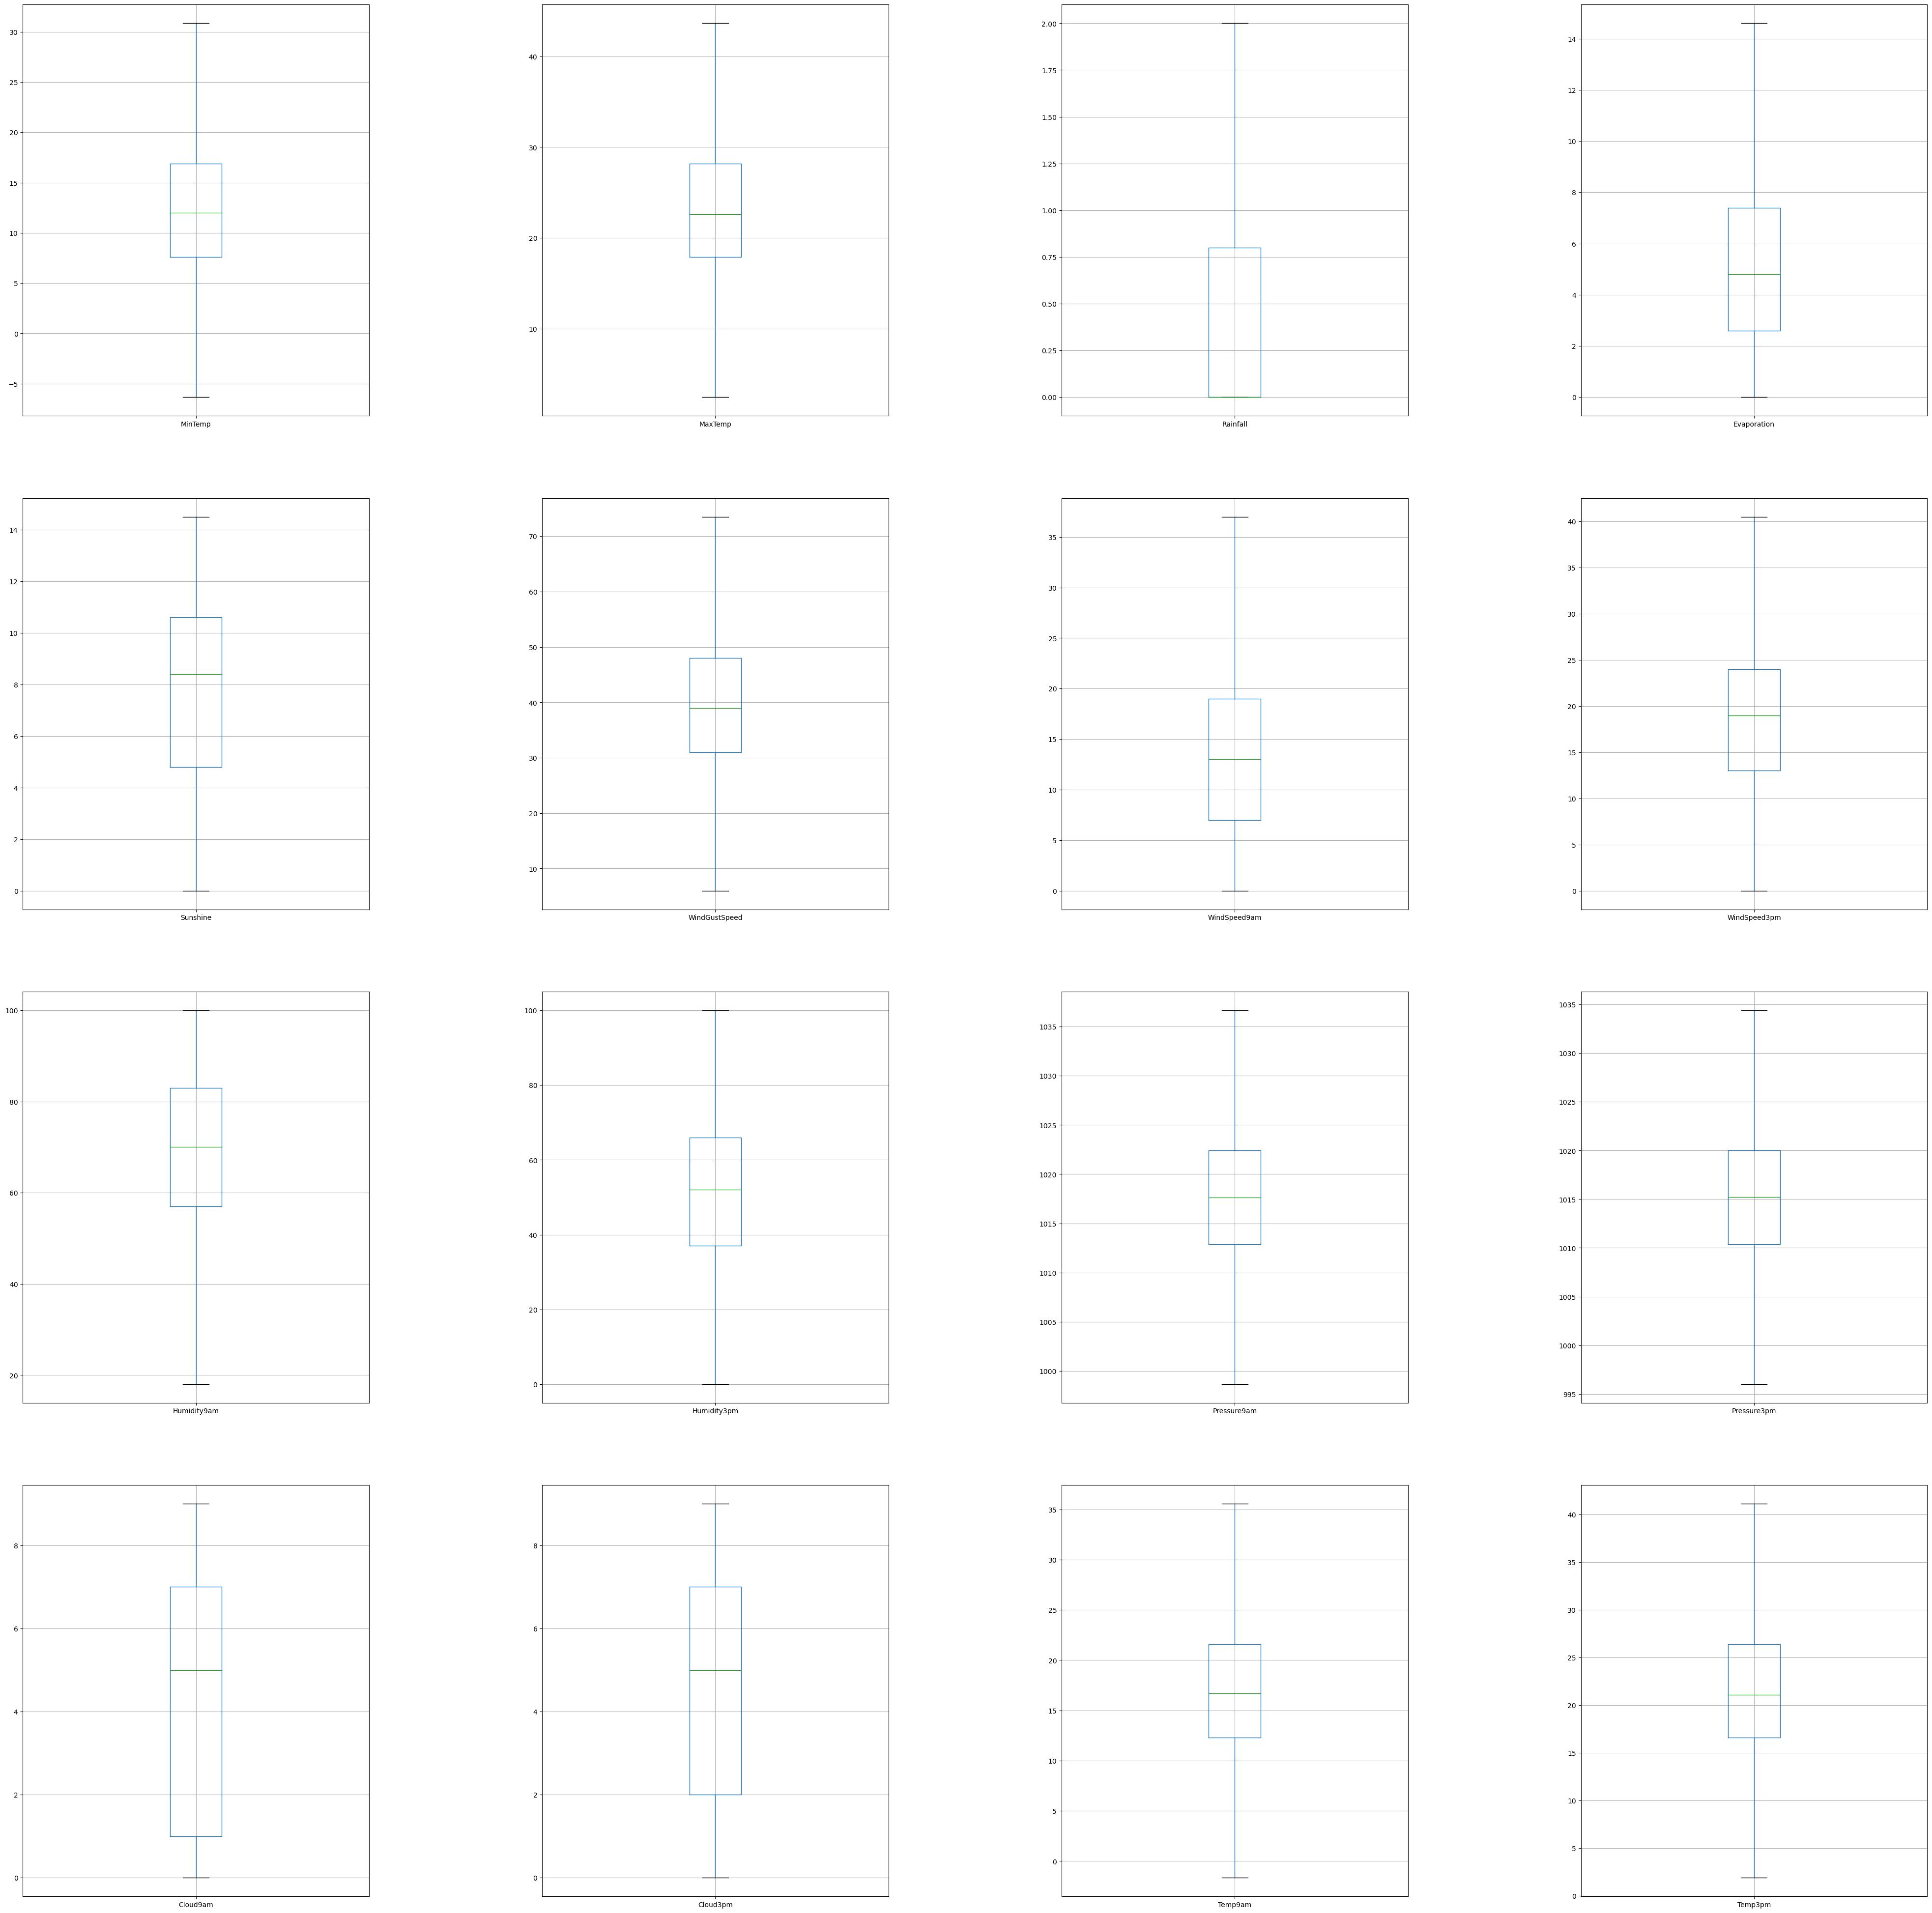

In [5]:
for feature in columns_which_are_numerical:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit
#now the outliers are removed from all the numerical fields
df[columns_which_are_numerical]

#lets print the box and whisker plot to confirm the outliers are removed from the main df
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4, 4, figsize=(50, 50))

# draw boxplots - for one column in each subplot
df.boxplot('MinTemp', ax=ax[0][0])
df.boxplot('MaxTemp', ax=ax[0][1])
df.boxplot('Rainfall', ax=ax[0][2])
df.boxplot('Evaporation', ax=ax[0][3])


df.boxplot('Sunshine', ax=ax[1][0])
df.boxplot('WindGustSpeed', ax=ax[1][1])
df.boxplot('WindSpeed9am', ax=ax[1][2])
df.boxplot('WindSpeed3pm', ax=ax[1][3])

df.boxplot('Humidity9am', ax=ax[2][0])
df.boxplot('Humidity3pm', ax=ax[2][1])
df.boxplot('Pressure9am', ax=ax[2][2])
df.boxplot('Pressure3pm', ax=ax[2][3])

df.boxplot('Cloud9am', ax=ax[3][0])
df.boxplot('Cloud3pm', ax=ax[3][1])
df.boxplot('Temp9am', ax=ax[3][2])
df.boxplot('Temp3pm', ax=ax[3][3])

plt.subplots_adjust(wspace=0.5) 

plt.show()

we see from the new box and whisker plot that the outliers are removed.
Since outliers are removed, we will replace the missing values of there numerical columns with mean

In [6]:
## split the Date column in Year Month Day for next step to replace the missing value by grouping of year and month
df_weather = df
df_weather[['Year', 'Month', 'Day']] = df['Date'].str.rsplit('-',n=0,expand=True)
col = df_weather.pop('Year')
col1 = df_weather.pop('Month')
col2 = df_weather.pop('Day')
df_weather.insert(0, col.name, col)
df_weather.insert(1, col1.name, col1)
df_weather.insert(2, col2.name, col2)
df_weather.drop('Date', axis=1, inplace = True)


/var/folders/kz/36nj487d0sgbg74v1kmzvdmc0000gn/T/ipykernel_34691/3491472514.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() >0,


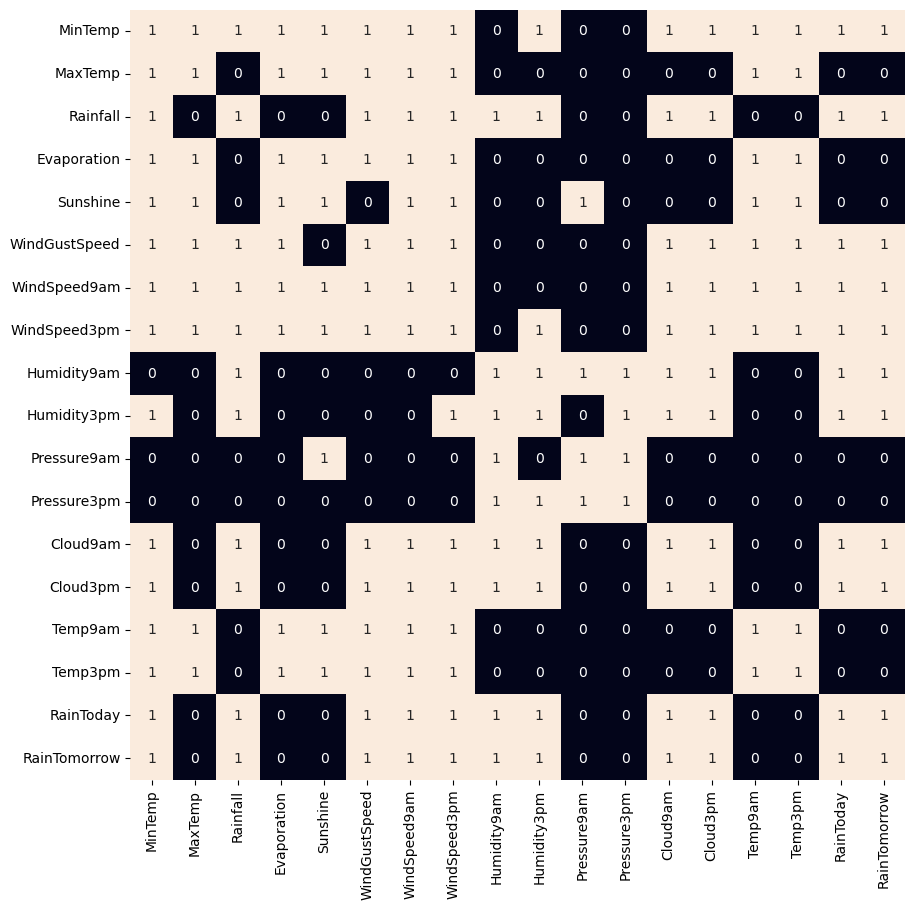

In [7]:
## replace all yes with 1 and no with 0
df_weather.replace({'Yes':1, 'No':0}, inplace=True)

## to determine which data has relationship (>0) 
## we can see the rainfall, RainToday and RainRomorrow are having the same list of related data  
plt.figure(figsize=(10,10))
sns.heatmap(df.corr() >0,
           annot=True,
           cbar=False)
plt.show()

In [8]:
## https://devskrol.com/2020/08/09/best-way-to-impute-nan-within-groups-mean-mode/
## replace the missing data with monthly mean for the column related and non-related to rainfall
list_norain = [ 'MaxTemp', 'Evaporation', 'Pressure9am', 'Pressure3pm', 'Sunshine',  'Temp9am','Temp3pm']
for i in list_norain:
    df_weather[i] = df_weather.groupby(['Year','Month'], sort=False)[i].apply(lambda x: x.fillna(x.mean()))

## replace the missing data related to rainfall with monthly mean
list_rain = ['MinTemp','Rainfall', 'Humidity9am' ,'WindGustSpeed','WindSpeed3pm', 'WindSpeed9am', 'Humidity3pm', 'Humidity9am', 'Cloud9am', 'Cloud3pm' ]
for r in list_rain:
    df_weather[r] = df_weather.groupby(['Year','Month','RainToday'], sort=False)[r].apply(lambda x: x.fillna(x.mean()))

## replace the missing categorical features with grouping of year, month and RainToday
list_c = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
for c in list_c:
    df_weather[c] = df_weather.groupby(['Year','Month','RainToday'], sort=False)[c].apply(lambda x: x.fillna(x.mode().iloc[0]))

## replace the remaining missing numerical and categorical features for the rows with NA in RainToday with grouping of year, month
for n in columns_which_are_numerical:
    df_weather[n] = df_weather.groupby(['Year','Month'], sort=False)[n].apply(lambda x: x.fillna(x.mean()))

for c in columns_which_are_categorical[1:-2]:
    df_weather[c] = df_weather.groupby(['Year','Month'], sort=False)[c].apply(lambda x: x.fillna(x.mode().iloc[0]))
## now all missing value are replaced

/var/folders/kz/36nj487d0sgbg74v1kmzvdmc0000gn/T/ipykernel_34691/2318508925.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_weather[i] = df_weather.groupby(['Year','Month'], sort=False)[i].apply(lambda x: x.fillna(x.mean()))
/var/folders/kz/36nj487d0sgbg74v1kmzvdmc0000gn/T/ipykernel_34691/2318508925.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and si

In [9]:
missing_values = df_weather.isnull().sum()
missing_values

Year                0
Month               0
Day                 0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday        3261
RainTomorrow     3267
dtype: int64

In [ ]:
columns_which_are_categorical

Now all missing values are being processed. 

In [ ]:
## to determine which data has relationship (>0) 
## we can see the rainfall, RainToday and RainRomorrow are having the same list of related data  
plt.figure(figsize=(10,10))
sns.heatmap(df.corr() >0,
           annot=True,
           cbar=False)
plt.show()

In [ ]:
##Data reduction, drop the columns is not affecting the rain %

#df_weather.drop(['MaxTemp', 'Evaporation', 'Pressure9am', 'Pressure3pm', 'Sunshine', 'Temp3pm','Temp9am'], axis=1, inplace = True)


In [ ]:
## to determine which data has relationship (>0) 
## we can see the rainfall, RainToday and RainRomorrow are having the same list of related data  
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),
           annot=True,
           cbar=False)
plt.show()

# Classification Tree for RainTomorrow
reference: https://saturncloud.io/blog/how-to-use-cross-validation-with-decision-trees-in-scikitlearn/

In [11]:
#import lib
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [12]:
#extract the rows containing NaN in RainTmr & RainTdy to a new dataframe, use decision tree to predict their value later 
df_predict_tmr=df_weather[df_weather['RainTomorrow'].isnull()]
df_predict_tdy=df_weather[df_weather['RainToday'].isnull()]


In [13]:
#remove the rows with NaN
clean_df = df_weather.dropna()
clean_df

,Year,Month,Day,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008,12,01,Albury,13.4,22.9,0.6,7.078959,8.629676,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.260623,16.9,21.8,0.0,0.0
1,2008,12,02,Albury,7.4,25.1,0.0,7.078959,8.629676,WNW,...,44.0,25.0,1010.6,1007.8,4.371191,4.260623,17.2,24.3,0.0,0.0
2,2008,12,03,Albury,12.9,25.7,0.0,7.078959,8.629676,WSW,...,38.0,30.0,1007.6,1008.7,4.371191,2.000000,21.0,23.2,0.0,0.0
3,2008,12,04,Albury,9.2,28.0,0.0,7.078959,8.629676,NE,...,45.0,16.0,1017.6,1012.8,4.371191,4.260623,18.1,26.5,0.0,0.0
4,2008,12,05,Albury,17.5,32.3,1.0,7.078959,8.629676,W,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017,06,20,Uluru,3.5,21.8,0.0,2.741813,6.264984,E,...,59.0,27.0,1024.7,1021.2,4.519553,4.866348,9.4,20.9,0.0,0.0
145455,2017,06,21,Uluru,2.8,23.4,0.0,2.741813,6.264984,E,...,51.0,24.0,1024.6,1020.3,4.519553,4.866348,10.1,22.4,0.0,0.0
145456,2017,06,22,Uluru,3.6,25.3,0.0,2.741813,6.264984,NNW,...,56.0,21.0,1023.5,1019.1,4.519553,4.866348,10.9,24.5,0.0,0.0
145457,2017,06,23,Uluru,5.4,26.9,0.0,2.741813,6.264984,N,...,53.0,24.0,1021.0,1016.8,4.519553,4.866348,12.5,26.1,0.0,0.0


In [14]:
print([column_name for column_name in df_weather.columns if df[column_name].dtype != 'O'])

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [15]:
#split dataset in features and target variable
feature_cols = ['Month', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
X = clean_df[feature_cols] # Features
y = clean_df.RainTomorrow # Target variable

In [50]:
X

,Month,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,12,13.4,22.9,0.6,7.078959,8.629676,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.260623,16.9,21.8
1,12,7.4,25.1,0.0,7.078959,8.629676,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.371191,4.260623,17.2,24.3
2,12,12.9,25.7,0.0,7.078959,8.629676,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.371191,2.000000,21.0,23.2
3,12,9.2,28.0,0.0,7.078959,8.629676,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.371191,4.260623,18.1,26.5
4,12,17.5,32.3,1.0,7.078959,8.629676,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,06,3.5,21.8,0.0,2.741813,6.264984,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,4.519553,4.866348,9.4,20.9
145455,06,2.8,23.4,0.0,2.741813,6.264984,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,4.519553,4.866348,10.1,22.4
145456,06,3.6,25.3,0.0,2.741813,6.264984,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,4.519553,4.866348,10.9,24.5
145457,06,5.4,26.9,0.0,2.741813,6.264984,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,4.519553,4.866348,12.5,26.1


In [49]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

In [53]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf=clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[18790  3128]
 [ 2917  3323]]


In [54]:
#and get the accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7853185595567868
Recall: 0.5325320512820513


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x12f5f2980> (for post_execute):


KeyboardInterrupt: 

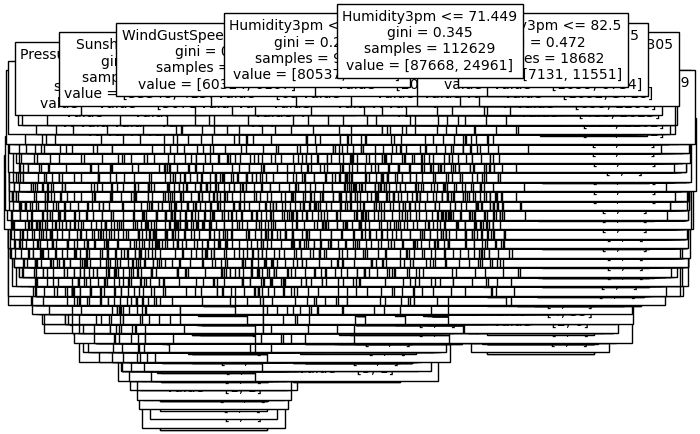

In [21]:
#print the tree
tree.plot_tree(clf, feature_names=feature_cols)

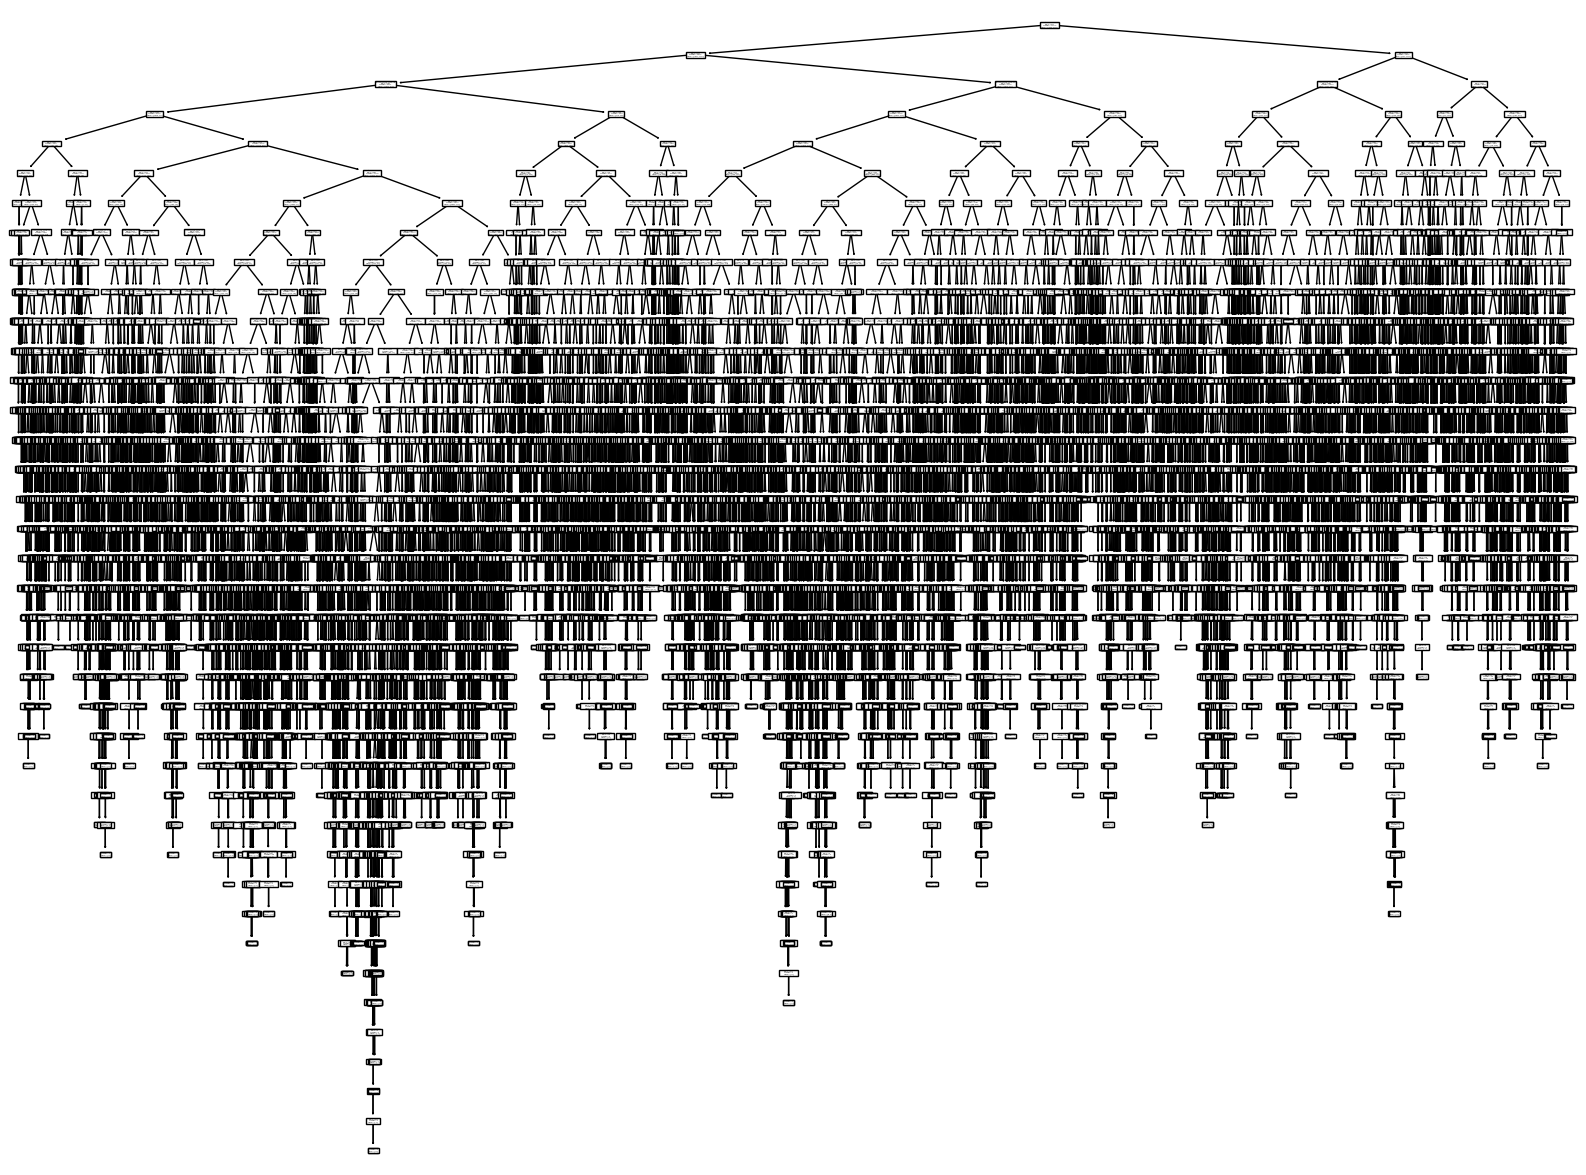

In [22]:
fig = plt.figure(figsize=(20,15))
tree.plot_tree(clf, feature_names=feature_cols)
fig.savefig("decistion_tree_before_tune.png")

# Hyperparameter Tuning and Cross Validation to Decision Tree
reference: https://www.youtube.com/watch?v=dA_x2xHTYQE

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from scipy.stats import randint

In [24]:
#use RandomizedSearchCV tpo find the optimized model
param_dist = {"max_depth": [3, None],
              "min_samples_leaf": randint(1,9),
              "criterion": ["gini", "entropy"]}
tree = DecisionTreeClassifier()
cv = RandomizedSearchCV(tree, param_dist, cv=5)
cv.fit(X_train, y_train)
print("Tuned Tree parameters: {}".format(cv.best_params_))
print("Best Score is: {}".format(cv.best_score_))

Tuned Tree parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2}
Best Score is: 0.8316685612669261


In [25]:
#Predict the test set and get the accuracy
y_pred = cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[20834  1084]
 [ 3618  2622]]
Accuracy: 0.8330137083599688


In [26]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8330137083599688
Recall: 0.4201923076923077


In [32]:
#tuned tree
tree_f = DecisionTreeClassifier(criterion= 'entropy', max_depth= 3, min_samples_leaf= 2)
tree_f.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2)

[Text(0.5, 0.875, 'Humidity3pm <= 66.168\nentropy = 0.763\nsamples = 112629\nvalue = [87668, 24961]'),
 Text(0.25, 0.625, 'Cloud3pm <= 4.908\nentropy = 0.543\nsamples = 86402\nvalue = [75615, 10787]'),
 Text(0.125, 0.375, 'Humidity3pm <= 42.128\nentropy = 0.399\nsamples = 57832\nvalue = [53257, 4575]'),
 Text(0.0625, 0.125, 'entropy = 0.263\nsamples = 29113\nvalue = [27812, 1301]'),
 Text(0.1875, 0.125, 'entropy = 0.512\nsamples = 28719\nvalue = [25445, 3274]'),
 Text(0.375, 0.375, 'WindGustSpeed <= 46.061\nentropy = 0.755\nsamples = 28570\nvalue = [22358, 6212]'),
 Text(0.3125, 0.125, 'entropy = 0.644\nsamples = 20234\nvalue = [16915, 3319]'),
 Text(0.4375, 0.125, 'entropy = 0.931\nsamples = 8336\nvalue = [5443, 2893]'),
 Text(0.75, 0.625, 'Humidity3pm <= 81.5\nentropy = 0.995\nsamples = 26227\nvalue = [12053, 14174]'),
 Text(0.625, 0.375, 'WindGustSpeed <= 43.985\nentropy = 0.977\nsamples = 17130\nvalue = [10100, 7030]'),
 Text(0.5625, 0.125, 'entropy = 0.911\nsamples = 11246\nvalue 

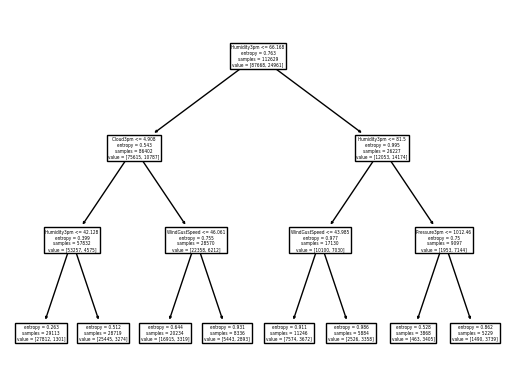

In [33]:
from sklearn import tree
#print tree
tree.plot_tree(tree_f, feature_names=feature_cols)

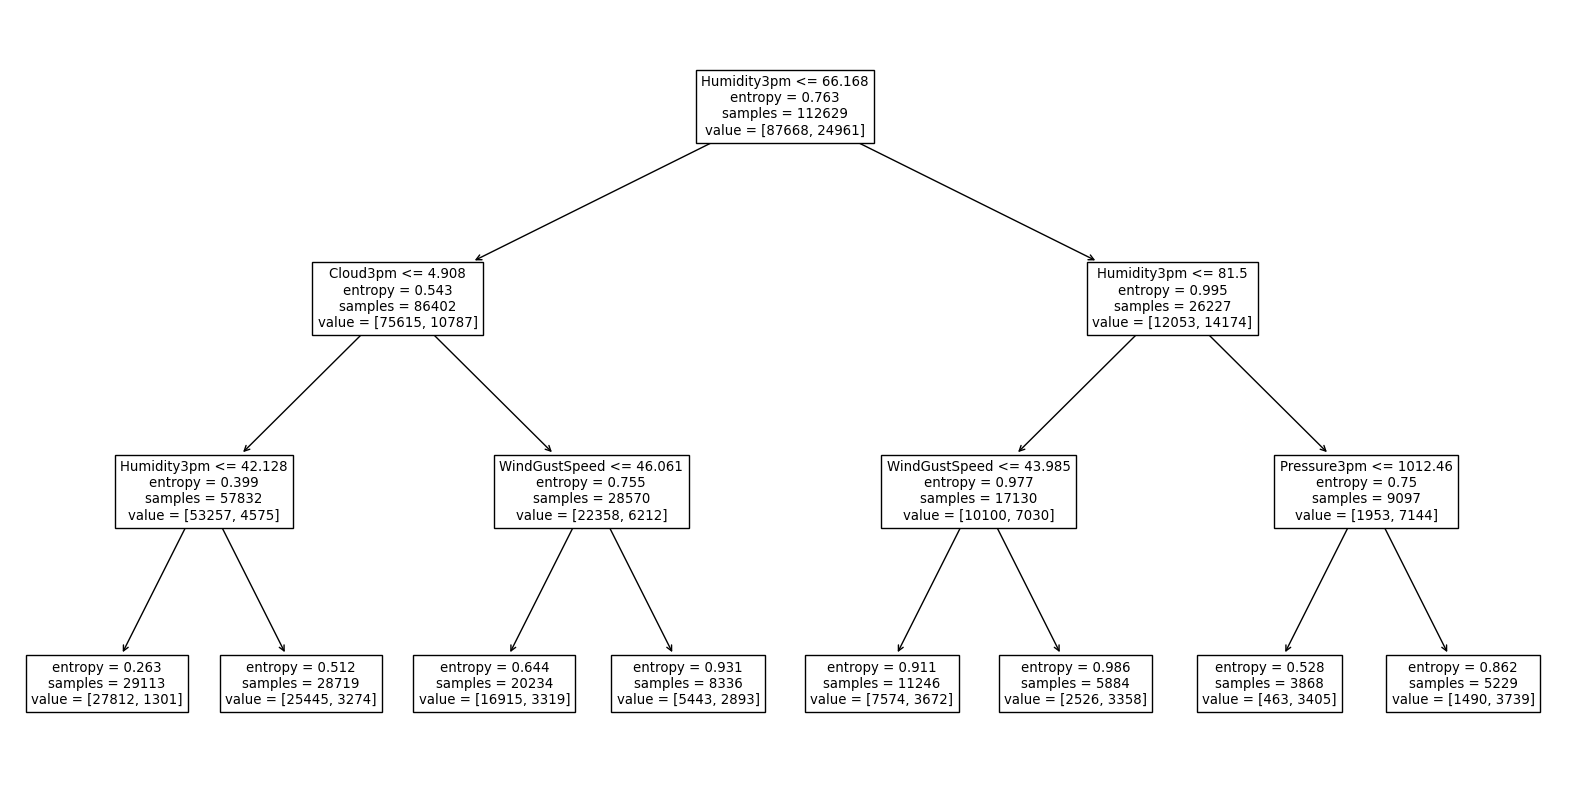

In [34]:
fig = plt.figure(figsize=(20,10))
tree.plot_tree(tree_f, feature_names=feature_cols)
fig.savefig("decistion_tree.png")

# Classification Tree for RainToday

In [57]:
y_tdy = clean_df.RainToday # Target variable

In [58]:
# Split dataset into training set and test set
X_train, X_test, y_tdy_train, y_tdy_test = train_test_split(X, y_tdy, test_size=0.2, random_state=1) # 80% training and 20% test

In [66]:
# Create Decision Tree classifer object
tree_tdy = DecisionTreeClassifier()

# Train Decision Tree Classifer
tree_tdy.fit(X_train,y_tdy_train)

#Predict the response for test dataset
y_tdy_pred = tree_tdy_f.predict(X_test)

cm = confusion_matrix(y_tdy_test, y_tdy_pred)
print(cm)

[[21835     0]
 [    0  6323]]


In [67]:
#and get the accuracy
print("Accuracy:",metrics.accuracy_score(y_tdy_test, y_tdy_pred))
print("Recall:",metrics.recall_score(y_tdy_test, y_tdy_pred))

Accuracy: 1.0
Recall: 1.0


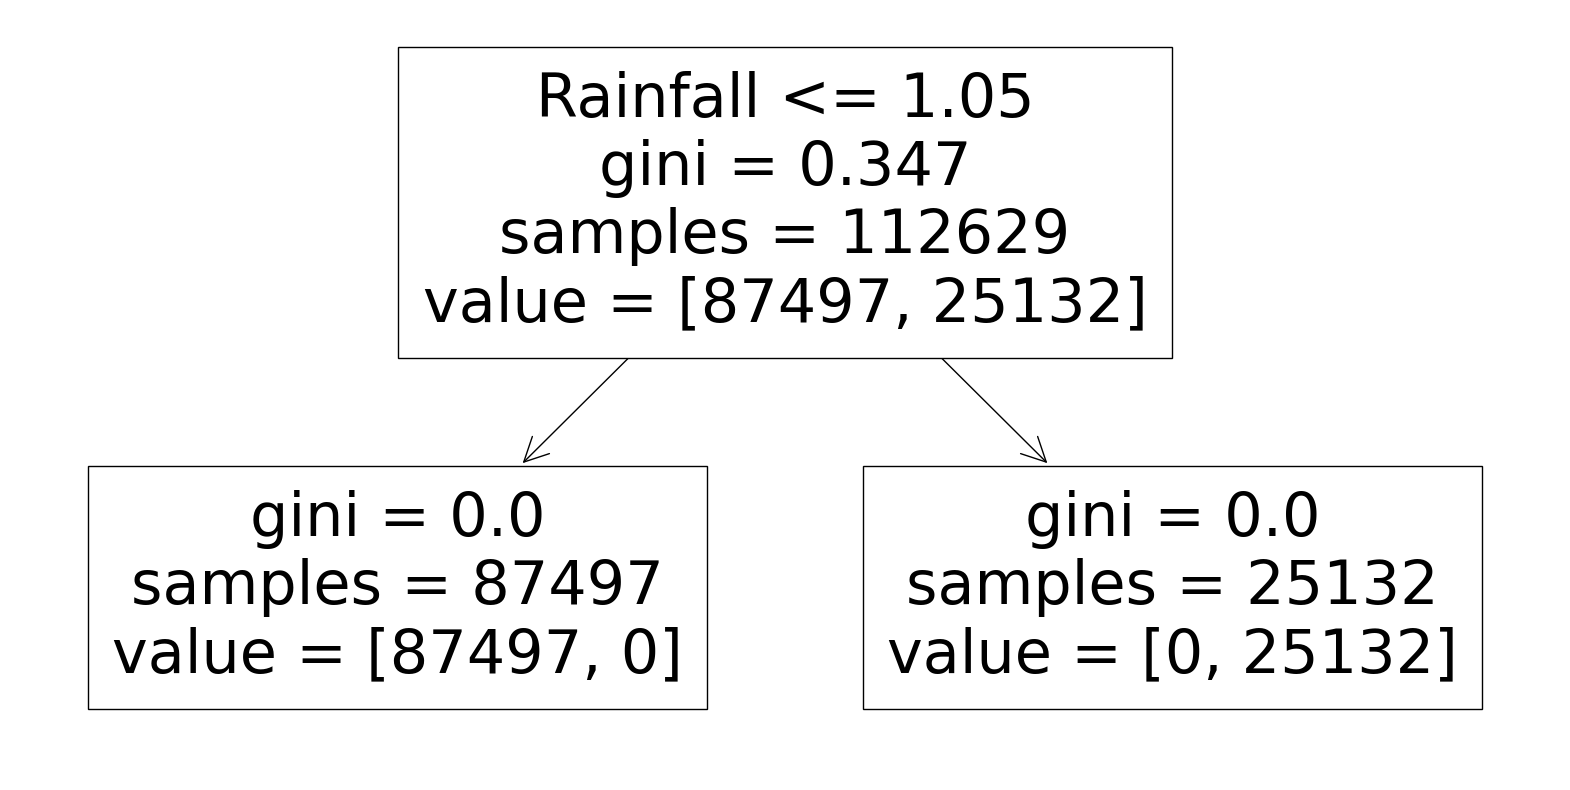

In [68]:
fig = plt.figure(figsize=(20,10))
tree.plot_tree(tree_tdy, feature_names=feature_cols)
fig.savefig("decistion_tree_for_Raintdy.png")

# Predict the RainToday and RainTomorrow 

In [72]:
#RainToday
# The final tree model
tree_tdy = DecisionTreeClassifier()
tree_tdy.fit(X_train,y_tdy_train)
X_tdy = df_predict_tdy[feature_cols]
#Predict the RainToday
df_predict_tdy["Predict RainToday"] = tree_tdy.predict(X_tdy)
df_predict_tdy.head()

/var/folders/kz/36nj487d0sgbg74v1kmzvdmc0000gn/T/ipykernel_34691/4113429803.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict_tdy["Predict RainToday"] = tree_tdy.predict(X_tdy)


,Year,Month,Day,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Predict RainToday
15,2008,12,16,Albury,15.582797,27.7,0.547383,7.078959,8.629676,NW,...,51.252688,1013.4,1010.3,4.840394,4.646205,17.3,26.2,NaN,0.0,0.0
284,2009,09,11,Albury,9.525503,18.8,0.569065,5.003108,7.658431,N,...,48.525210,1022.2,1018.2,3.903582,4.100018,8.7,18.1,NaN,0.0,0.0
436,2010,02,10,Albury,18.185265,35.6,0.485463,7.270309,8.643392,SE,...,51.180843,1018.8,1014.7,4.420502,4.614975,25.2,32.9,NaN,0.0,0.0
438,2010,02,12,Albury,18.185265,29.1,0.485463,7.270309,8.643392,SE,...,51.180843,1008.5,1007.8,4.420502,4.614975,23.4,26.4,NaN,0.0,0.0
444,2010,02,18,Albury,18.185265,31.2,0.485463,7.270309,8.643392,SE,...,51.180843,1020.4,1019.1,4.420502,4.614975,21.0,30.0,NaN,0.0,0.0


In [73]:
#RainTomorrow
# The final tree model
X_tmr = df_predict_tmr[feature_cols]
#Predict the RainToday
df_predict_tmr["Predict RainTomorrow"] = tree_f.predict(X_tmr)
df_predict_tmr.head()

/var/folders/kz/36nj487d0sgbg74v1kmzvdmc0000gn/T/ipykernel_34691/790574783.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict_tmr["Predict RainTomorrow"] = tree_f.predict(X_tmr)


,Year,Month,Day,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Predict RainTomorrow
14,2008,12,15,Albury,8.4,24.600000,0.0,7.078959,8.629676,NW,...,32.0,1009.7,1008.7,4.371191,4.260623,15.9,23.5,0.0,NaN,0.0
283,2009,09,10,Albury,2.6,20.689513,0.0,5.003108,7.658431,N,...,55.0,1017.8,1017.6,3.319084,6.000000,9.7,14.3,0.0,NaN,0.0
435,2010,02,09,Albury,22.1,35.100000,0.0,7.270309,8.643392,SE,...,37.0,1020.9,1017.8,3.847458,1.000000,26.9,33.5,0.0,NaN,0.0
437,2010,02,11,Albury,21.5,35.000000,0.0,7.270309,8.643392,SE,...,35.0,1015.8,1010.3,3.847458,8.000000,24.2,33.1,0.0,NaN,0.0
443,2010,02,17,Albury,15.5,30.600000,0.0,7.270309,8.643392,SE,...,30.0,1015.9,1013.8,3.847458,4.192790,19.4,30.0,0.0,NaN,0.0


In [74]:
df_predict_tmr.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Predict RainTomorrow
count,3267.000000,3267.000000,3267.000000,3267.000000,3267.000000,3267.000000,3267.000000,3267.000000,3267.000000,3267.000000,3267.000000,3267.000000,3267.000000,3267.000000,3267.000000,3267.000000,1412.000000,0.0,3267.000000
mean,12.381156,23.332811,0.544551,5.220432,7.288202,40.299581,14.236428,18.714359,69.650070,52.585775,1017.575952,1015.241565,4.543286,4.575466,17.346155,21.820089,0.300992,NaN,0.065810
std,5.187048,6.551558,0.581778,2.708747,2.643687,7.714276,6.246503,5.794500,12.578766,13.667061,6.255402,6.184499,1.395288,1.230061,5.747810,6.288574,0.458852,NaN,0.247987
min,-6.350000,2.450000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,18.000000,6.000000,998.650000,996.000000,0.000000,0.000000,-1.650000,1.900000,0.000000,NaN,0.000000
25%,8.506716,18.350000,0.200000,3.093729,6.002381,36.517469,11.915654,16.465482,62.365288,46.167591,1013.447295,1011.315750,3.951902,4.004113,13.100000,16.933827,0.000000,NaN,0.000000
50%,12.429463,23.300000,0.449188,4.940915,7.572911,40.379542,13.955083,18.948460,69.241741,51.000000,1017.416792,1014.994891,4.437008,4.534023,17.380669,21.600000,0.000000,NaN,0.000000
75%,16.354439,28.300000,0.569065,7.120679,8.874238,43.104288,15.381544,20.160618,76.715247,57.404350,1021.764426,1019.300000,4.807697,4.874852,21.676825,26.409620,1.000000,NaN,0.000000
max,27.500000,43.650000,2.000000,14.600000,13.800000,73.500000,37.000000,40.500000,100.000000,100.000000,1036.650000,1034.400000,8.000000,8.000000,35.550000,41.100000,1.000000,NaN,1.000000


In [3]:
df_predict_tdy.describe()

NameError: name 'df_predict_tdy' is not defined

In [76]:
df_predict_tmr.to_csv('RainTmr_Predict.csv', index=False)
df_predict_tdy.to_csv('RainTdy_Predict.csv', index=False)

In [77]:
df_weather.to_csv('df_weather_decision_tree.csv', index=False)

In [78]:
clean_df.to_csv('removedNaN_for_decision_tree.csv', index=False)

In [84]:
for i in clean_df.columns:
    print(i, end="+")

Year+Month+Day+Location+MinTemp+MaxTemp+Rainfall+Evaporation+Sunshine+WindGustDir+WindGustSpeed+WindDir9am+WindDir3pm+WindSpeed9am+WindSpeed3pm+Humidity9am+Humidity3pm+Pressure9am+Pressure3pm+Cloud9am+Cloud3pm+Temp9am+Temp3pm+RainToday+RainTomorrow+

In [29]:
df_predict_tmr = pd.read_csv('RainTmr_Predict.csv')
df_predict = pd.read_csv('RainTdy_Predict.csv')
r_predict_tdy = pd.read_csv('R_RainTdy_Predict.csv')
r_predict_tmr = pd.read_csv('R_RainTmr_Predict.csv')

In [26]:
df_predict_tmr[df_predict_tmr == 1].sum(axis=0)

Year                      0.0
Month                   315.0
Day                      98.0
Location                    0
MinTemp                   0.0
MaxTemp                   0.0
Rainfall                 12.0
Evaporation              17.0
Sunshine                  4.0
WindGustDir                 0
WindGustSpeed             0.0
WindDir9am                  0
WindDir3pm                  0
WindSpeed9am              0.0
WindSpeed3pm              0.0
Humidity9am               0.0
Humidity3pm               0.0
Pressure9am               0.0
Pressure3pm               0.0
Cloud9am                 94.0
Cloud3pm                 80.0
Temp9am                   2.0
Temp3pm                   0.0
RainToday               425.0
RainTomorrow              0.0
Predict RainTomorrow    215.0
dtype: object

In [28]:
df_predict[df_predict == 1].sum(axis=0)

Year                   0.0
Month                322.0
Day                  115.0
Location                 0
MinTemp                0.0
MaxTemp                0.0
Rainfall               0.0
Evaporation           18.0
Sunshine               6.0
WindGustDir              0
WindGustSpeed          0.0
WindDir9am               0
WindDir3pm               0
WindSpeed9am           0.0
WindSpeed3pm           0.0
Humidity9am            0.0
Humidity3pm            0.0
Pressure9am            0.0
Pressure3pm            0.0
Cloud9am               0.0
Cloud3pm               0.0
Temp9am                1.0
Temp3pm                0.0
RainToday              0.0
RainTomorrow         676.0
Predict RainToday      0.0
dtype: object

In [31]:
r_predict_tdy[r_predict_tdy == 1].sum(axis=0)

Year                       0.0
Month                    322.0
Day                      115.0
Location                     0
MinTemp                    0.0
MaxTemp                    0.0
Rainfall                   0.0
Evaporation               18.0
Sunshine                   6.0
WindGustDir                  0
WindGustSpeed              0.0
WindDir9am                   0
WindDir3pm                   0
WindSpeed9am               0.0
WindSpeed3pm               0.0
Humidity9am                0.0
Humidity3pm                0.0
Pressure9am                0.0
Pressure3pm                0.0
Cloud9am                   0.0
Cloud3pm                   0.0
Temp9am                    1.0
Temp3pm                    0.0
RainToday                  0.0
RainTomorrow             676.0
Predict.RainToday          0.0
R_predicted_RainToday      0.0
dtype: object

In [32]:
r_predict_tmr[r_predict_tmr == 1].sum(axis=0)

Year                          0.0
Month                       315.0
Day                          98.0
Location                        0
MinTemp                       0.0
MaxTemp                       0.0
Rainfall                     12.0
Evaporation                  17.0
Sunshine                      4.0
WindGustDir                     0
WindGustSpeed                 0.0
WindDir9am                      0
WindDir3pm                      0
WindSpeed9am                  0.0
WindSpeed3pm                  0.0
Humidity9am                   0.0
Humidity3pm                   0.0
Pressure9am                   0.0
Pressure3pm                   0.0
Cloud9am                     94.0
Cloud3pm                     80.0
Temp9am                       2.0
Temp3pm                       0.0
RainToday                   425.0
RainTomorrow                  0.0
Predict.RainTomorrow        215.0
R_predicted_RainTomorrow    149.0
dtype: object